Using Interact
In this lecture we will begin to learn about creating dashboard-type GUI with iPython widgets!

The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. 
It is the easiest way to get started using IPython's widgets.

In [1]:
# Start with some imports!
#Let's check out interact

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
#Basic interact¶
#At the most basic level, interact auto-generates UI controls for function arguments,
#and then calls the function with those arguments when you manipulate the controls interactively. 
#To use interact, you need to define a function that you want to explore.
#Here is a function that prints its only argument x.
def func(x):
    return x

In [3]:
func(1)

1

In [5]:
#Now we call interact and pass in our func and some default value
interact(func, x = 10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.func(x)>

In [6]:
#Now what if we want to return the square?
def func(x):
    return x**2

In [8]:
#When I use interact now as I slide myy dot I see the square returned as an output
#This is really cool because I can visualize the output as I vary my input
interact(func, x = 10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.func(x)>

In [10]:
#What happens if I apply interact to a sring?
def func(x):
    return x


In [11]:
#interact is smart enough that it knows what type of feature to return based on the input:
interact(func, x = 'Hello')

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.func(x)>

An explanation of what happened above: When you pass this function as the first argument to interact along with an integer
keyword argument (x=10), a slider is generated and bound to the function parameter. 
When you move the slider, the function is called, which prints the current value of x.

If you pass True or False, interact will generate a check-box:


In [12]:
interact(func, x = True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.func(x)>

In [13]:
#If you pass a string, interact will generate a text area.
interact(func, x = 'Happy!')

interactive(children=(Text(value='Happy!', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.func(x)>

interact can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows,
interact also works with functions that have multiple arguments

In [14]:
##Let's create a function g that takes x and y and returns a tuple(x, y)
@interact(x = True, y = 1.0)
def g(x, y):
    return(x,y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

Fixing arguments using fixed

There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. 
This can be accomplished by wrapping values with the fixed function.

In [17]:
#We can use the same function g as above but with y fixed
#Now we no longer have the option to choose different values of y with the slider
@interact(x = True, y = fixed(1.0))
def g(x, y):
    return(x,y)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

Widget abbreviations

When you pass an integer-valued keyword argument of 10 (x=10) to interact, it generates an integer-valued slider control
with a range of [-10,+3\times10]. In this case, 10 is an abbreviation for an actual slider widget:

IntSlider(min=-10,max=30,step=1,value=10)
In fact, we can get the same result if we pass this IntSlider as the keyword argument for x:

In [19]:
interact(func, x = widgets.IntSlider(min = -100, max = 100, step = 1, value = 0))

interactive(children=(IntSlider(value=0, description='x', min=-100), Output()), _dom_classes=('widget-interact…

<function __main__.func(x)>

In [22]:
#The above can be writeen in shorter form
interact(func, x = (-100, 100, 1))

interactive(children=(IntSlider(value=0, description='x', min=-100), Output()), _dom_classes=('widget-interact…

<function __main__.func(x)>

This examples clarifies how interact processes its keyword arguments:

If the keyword argument is a Widget instance with a value attribute, 
that widget is used. Any widget with a value attribute can be used, even custom ones.
Otherwise, the value is treated as a widget abbreviation that is converted to a widget before it is used.

In [23]:
#How to create a dropdown menu
interact(func, x = ['hello', 'option1', 'option2'])

interactive(children=(Dropdown(description='x', options=('hello', 'option1', 'option2'), value='hello'), Outpu…

<function __main__.func(x)>

Note that a dropdown is used if a list or a dict is given (signifying discrete choices), and a slider is used if a tuple is 
given (signifying a range).

You have seen how the checkbox and text area widgets work above. Here, more details about the different abbreviations
for sliders and drop-downs are given.

If a 2-tuple of integers is passed (min,max), an integer-valued slider is produced with those minimum and maximum values (inclusively). 
In this case, the default step size of 1 is used.

In [25]:
interact(func, x=(0,4));

interactive(children=(IntSlider(value=2, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

In [27]:
#If a 3-tuple of integers is passed (min,max,step), the step size can also be set.

# (min, max, step)
interact(func, x=(0,8,2));

interactive(children=(IntSlider(value=4, description='x', max=8, step=2), Output()), _dom_classes=('widget-int…

In [28]:
#A float-valued slider is produced if the elements of the tuples are floats. Here the minimum is 0.0, 
#the maximum is 10.0 and step size is 0.1 (the default).
interact(func, x=(0.0,10.0));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

In [30]:
#The step size can be changed by passing a third element in the tuple.
interact(func, x=(0.0,10.0,0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

For both integer and float-valued sliders, you can pick the initial value of the widget by passing
a default keyword argument to the underlying Python function.
Here we set the initial value of a float slider to 5.5.

In [31]:

@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

Going back to dropdown menus:
    
Dropdown menus are constructed by passing a list of strings. 
In this case, the strings are both used as the names in the drop-down menu UI and passed to the underlying Python function.

In [33]:

interact(func, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…


If you want a drop-down menu that passes non-string values to the Python function, you can pass a dictionary. The keys in the dictionary are used for the names in the drop-down menu UI and the values are the arguments 
that are passed to the underlying Python function.

In [35]:
interact(func, x={'one': 10, 'two': 20});

interactive(children=(Dropdown(description='x', options={'one': 10, 'two': 20}, value=10), Output()), _dom_cla…

Using function annotations with interact
You can also specify widget abbreviations using function annotations.

Define a function with a checkbox widget abbreviation for the argument x.


Then, because the widget abbreviation has already been defined, you can call interact with a single argument.

interactive
In addition to interact, IPython provides another function, interactive, that is useful when you want to reuse the widgets that are produced or 
access the data that is bound to the UI controls.

Note that unlike interact, the return value of the function will not be displayed automatically,
but you can display a value inside the function with IPython.display.display.

Here is a function that returns the sum of its two arguments and displays them.
The display line may be omitted if you don’t want to show the result of the function.

In [37]:

from IPython.display import display

def f(a, b):
    display(a + b)
    return a+b

In [38]:
#Unlike interact, interactive returns a Widget instance rather than immediately displaying the widget.
w = interactive(f, a=10, b=20)

In [39]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

MORE WIDGET FUN!

Widget Basics

In this lecture we will continue to build off our understanding of interact and interactive to begin using full widgets!

What are widgets?

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

What can they be used for?

You can use widgets to build interactive GUIs for your notebooks.
You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.


In [42]:
#Using widgets
#To use the widget framework, you need to import ipywidgets.

import ipywidgets as widgets

In [43]:
#repr
#Widgets have their own display repr which allows them to be displayed using IPython's display framework. 
#Constructing and returning an IntSlider automatically displays the widget (as seen below).
#Widgets are displayed inside the output area below the code cell. Clearing cell output will also remove the widget.
widgets.IntSlider()

IntSlider(value=0)

In [44]:
#display()
#You can also explicitly display the widget using display(...).
from IPython.display import display

In [45]:
w = widgets.IntSlider()

In [46]:
display(w)

IntSlider(value=0)

Multiple display() calls

If you display the same widget twice, the displayed instances in the front-end will remain in sync with each other. 
Try dragging the slider below and watch the slider above.

In [47]:
display(w)

IntSlider(value=0)

Closing widgets

You can close a widget by calling its close() method.

In [49]:
w.close()

Widget properties

All of the IPython widgets share a similar naming scheme. To read the value of a widget, you can query its value property.

In [50]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [51]:
#We can check the value
w.value

0

In [52]:
#Now we slide the bar above and the value will change
w.value

23

In [54]:
#Similarly, to set a widget's value, you can set its value property. For ex if you set the value to 40 you will se the bar 
#above change to 40
w.value = 40

Keys

In addition to value, most widgets share keys, description, and disabled. To see the entire list of synchronized, 
stateful properties of any specific widget, you can query the keys property.

In [55]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

Shorthand for setting the initial values of widget properties

While creating a widget, you can set some or all of the initial values of that widget by defining them as keyword arguments 
in the widget's constructor (as seen below).

In [56]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

Linking two similar widgets

If you need to display the same value two different ways, you'll have to use two different widgets.
Instead of attempting to manually synchronize the values of the two widgets, you can use the link or jslink 
function to link two properties together (the difference between these is discussed in Widget Events).
Below, the values of two widgets are linked together.

In [57]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

Unlinking widgets
Unlinking the widgets is simple. All you have to do is call .unlink on the link object.
Try changing one of the widgets above after unlinking to see that they can be independently changed.

In [58]:

mylink.unlink()

In [59]:
display(a,b)

FloatText(value=44.5)

FloatSlider(value=44.5)

Widget List

This lecture will serve as a reference for widgets, providing a list of the GUI widgets available!

Complete list

For a complete list of the GUI widgets available to you, you can list the registered widget types. Widget is the base class.

In [60]:
import ipywidgets as widgets

# Show all available widgets!
for item in widgets.Widget.widget_types.items():
    print(item[0][2][:-5])

Layout
Accordion
Audio
BoundedFloatText
BoundedIntText
Box
Button
ButtonStyle
Checkbox
ColorPicker
Combobox
ControllerAxis
ControllerButton
Controller
DOMWidget
DatePicker
DescriptionStyle
DirectionalLink
Dropdown
FileUpload
FloatLogSlider
FloatProgress
FloatRangeSlider
FloatSlider
FloatText
GridBox
HBox
HTMLMath
HTML
Image
IntProgress
IntRangeSlider
IntSlider
IntText
Label
Link
Password
Play
ProgressStyle
RadioButtons
Select
SelectMultiple
SelectionRangeSlider
SelectionSlider
SliderStyle
Tab
Text
Textarea
ToggleButton
ToggleButtons
ToggleButtonsStyle
VBox
Valid
Video
Output


Numeric widgets

There are 10 widgets distributed with IPython that are designed to display numeric values. Widgets exist for displaying integers and floats, both bounded and unbounded. The integer widgets share a similar naming scheme to their floating point counterparts. 
By replacing Float with Int in the widget name, you can find the Integer equivalent

In [63]:
#IntSlider, we saw this already

widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [66]:
#FloatSlider
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

In [67]:
#Sliders can also be displayed vertically.
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

In [68]:
#IntRangeSlider

widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

IntRangeSlider(value=(5, 7), continuous_update=False, description='Test:', max=10)

In [69]:
#FloatRangeSlider
widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(5.0, 7.5), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

In [72]:
#IntProgress
widgets.IntProgress(
    value=10,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

IntProgress(value=10, description='Loading:', max=10)

In [74]:
#FloatProgress
widgets.FloatProgress(
    value=8.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

FloatProgress(value=8.5, bar_style='info', description='Loading:', max=10.0)

In [75]:
#BoundedIntText
widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Text:',
    disabled=False
)

BoundedIntText(value=7, description='Text:', max=10)

In [76]:
#BoundedFloatText¶
widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
    disabled=False
)

BoundedFloatText(value=7.5, description='Text:', max=10.0, step=0.1)

In [77]:
#IntText
widgets.IntText(
    value=7,
    description='Any:',
    disabled=False
)

IntText(value=7, description='Any:')

In [78]:
#FloatText
widgets.FloatText(
    value=7.5,
    description='Any:',
    disabled=False
)

FloatText(value=7.5, description='Any:')

Boolean widgets

There are three widgets that are designed to display a boolean value.

In [79]:
#ToggleButton¶

widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

ToggleButton(value=False, description='Click me', icon='check', tooltip='Description')

In [80]:
#Checkbox

widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

Checkbox(value=False, description='Check me')

Valid

The valid widget provides a read-only indicator.

In [81]:
widgets.Valid(
    value=False,
    description='Valid!',
)

Valid(value=False, description='Valid!')

Selection widgets

There are several widgets that can be used to display single selection lists, and two that can be used to select multiple values. All inherit from the same base class. You can specify the enumeration of selectable options by passing a list (options are either (label, value) pairs, or simply values for which the labels are derived by calling str). You can also specify the enumeration as a dictionary, in which case the keys will be used as the item displayed in the list and the corresponding value will be used when an item is selected (in this case, since dictionaries are unordered, 
the displayed order of items in the widget is unspecified).

In [82]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [84]:
#This is also valid
widgets.Dropdown(
    options={'One': 1, 'Two': 2, 'Three': 3},
    value=2,
    description='Number:',
)

Dropdown(description='Number:', index=1, options={'One': 1, 'Two': 2, 'Three': 3}, value=2)

In [85]:
#RadioButtons¶

widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
    # value='pineapple',
    description='Pizza topping:',
    disabled=False
)

RadioButtons(description='Pizza topping:', options=('pepperoni', 'pineapple', 'anchovies'), value='pepperoni')

In [86]:
#Select

widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'OSX'), value='OSX')

In [87]:
#Selecion Slider
widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

SelectionSlider(continuous_update=False, description='I like my eggs ...', index=1, options=('scrambled', 'sun…

SelectionRangeSlider

The value, index, and label keys are 2-tuples of the min and max values selected. The options must be nonempty.

In [88]:
import datetime
dates = [datetime.date(2015,i,1) for i in range(1,13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0,11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …

In [89]:
#ToggleButtons
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
    # icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

SelectMultiple

Multiple values can be selected with shift and/or ctrl (or command) pressed and mouse clicks or arrow keys.

In [90]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    # rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

String widgets

There are several widgets that can be used to display a string value.
The Text and Textarea widgets accept input. The HTML and HTMLMath widgets display a string as HTML (HTMLMath also renders math). 
The Label widget can be used to construct a custom control label

In [93]:
#Text
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Text(value='Hello World', description='String:', placeholder='Type something')

In [94]:
#Textarea

widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello World', description='String:', placeholder='Type something')

Label

The Label widget is useful if you need to build a custom description next to a c
ontrol using similar styling to the built-in control descriptions.

In [95]:
widgets.HBox([widgets.Label(value="The $m$ in $E=mc^2$:"), widgets.FloatSlider()])

In [96]:
#HTML
widgets.HTML(
    value="Hello <b>World</b>",
    placeholder='Some HTML',
    description='Some HTML',
)

HTML(value='Hello <b>World</b>', description='Some HTML', placeholder='Some HTML')

In [97]:
#HTML Math

widgets.HTMLMath(
    value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",
    placeholder='Some HTML',
    description='Some HTML',
)

HTMLMath(value='Some math and <i>HTML</i>: \\(x^2\\) and $$\\frac{x+1}{x-1}$$', description='Some HTML', place…

In [101]:
#Button
widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')


Widget Events

In this lecture we will discuss widget events, such as button clicks!

Special events
The Button is not used to represent a data type. Instead the button widget is used to handle mouse clicks
The on_click method of the Button can be used to register a function to be called when the button is clicked. 
The docstring of the on_click can be seen below.

In [102]:
import ipywidgets as widgets

print(widgets.Button.on_click.__doc__)

Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        



Example #1 - on_click¶

Since button clicks are stateless, they are transmitted from the front-end to the back-end using custom messages. By using the on_click method, 
a button that prints a message when it has been clicked is shown below.

In [103]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Widget Styling
In this lecture we will learn about the various ways to style widgets!

style vs. layout
There are two ways to change the appearance of widgets in the browser. The first is through the layout attribute which exposes
layout-related CSS properties for the top-level DOM element of widgets, such as margins and positioning. 

The second is through the style attribute which exposes non-layout related attributes like button color and font weight. 
While layout is general to all widgets and containers of widgets, style offers tools specific to each type of widget.

Thorough understanding of all that layout has to offer requires knowledge of front-end web development, 
including HTML and CSS. This section provides a brief overview of things that can be adjusted using layout.
However, the full set of tools are provided in the separate notebook Advanced Widget Styling with Layout.

To learn more about web development, including HTML and CSS, check out the course Python and Django Full Stack Web Developer
Bootcamp

Basic styling is more intuitive as it relates directly to each type of widget. 
Here we provide a set of helpful examples of the style attribute.

The layout attribute
Jupyter interactive widgets have a layout attribute exposing a number of CSS properties that impact how widgets are laid out. 
These properties map to the values of the CSS properties of the same name (underscores being replaced with dashes), applied
to the top DOM elements of the corresponding widget.

Sizes
height
width
max_height
max_width
min_height
min_width
Display
visibility
display
overflow
overflow_x
overflow_y
Box model
border
margin
padding
Positioning
top
left
bottom
right
Flexbox
order
flex_flow
align_items
flex
align_self
align_content
justify_content



A quick example of layout

We've already seen what a slider looks like without any layout adjustments:

In [108]:
import ipywidgets as widgets
from IPython.display import display

w = widgets.IntSlider()
display(w)

IntSlider(value=0)

Let's say we wanted to change two of the properties of this widget: margin and height. We want to center the slider in the output area and increase its height. 
This can be done by adding layout attributes to w

In [110]:
#Notice that the slider changed positions on the page immediately!
w.layout.margin = 'auto'
w.layout.height = '75px'

Layout settings can be passed from one widget to another widget of the same type. Let's first create a new IntSlider:

In [111]:
x = widgets.IntSlider(value=15,description='New slider')
display(x)

IntSlider(value=15, description='New slider')

In [112]:
#Now assign w's layout settings to x:
x.layout = w.layout


Predefined styles
Before we investigate the style attribute, it should be noted that many widgets offer a list of pre-defined styles that can be passed as arguments during creation.

For example, the Button widget has a button_style attribute that may take 5 different values:

'primary'
'success'
'info'
'warning'
'danger'
besides the default empty string ''.

In [113]:
import ipywidgets as widgets

widgets.Button(description='Ordinary Button', button_style='')

Button(description='Ordinary Button', style=ButtonStyle())

In [115]:
#Let's give it a style based on Bootstraps:
widgets.Button(description='Danger Button', button_style='danger')

#Ta dah! Look how pretty is our Button not all in red!

Button(button_style='danger', description='Danger Button', style=ButtonStyle())

The style attribute

While the layout attribute only exposes layout-related CSS properties for the top-level DOM element of widgets, 
the style attribute is used to expose non-layout related styling attributes of widgets.

However, the properties of the style atribute are specific to each widget type.

In [116]:
b1 = widgets.Button(description='Custom color')
b1.style.button_color = 'lightgreen'
b1

Button(description='Custom color', style=ButtonStyle(button_color='lightgreen'))

You can get a list of the style attributes for a widget with the keys property.

In [117]:

b1.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'button_color',
 'font_weight']

Note that widgets.Button().style.keys also works.

Just like the layout attribute, widget styles can be assigned to other widgets.

In [119]:
b2 = widgets.Button()
b2.style = b1.style
b2

Button(style=ButtonStyle(button_color='lightgreen'))


Note that only the style was picked up by b2, not any other parameters like description.

Widget styling attributes are specific to each widget type.

In [120]:
s1 = widgets.IntSlider(description='Blue handle')
s1.style.handle_color = 'lightblue'
s1

IntSlider(value=0, description='Blue handle', style=SliderStyle(handle_color='lightblue'))

In [121]:
s1 = widgets.IntSlider(description='Blue handle')
s1.style.handle_color = 'yellow'
s1

IntSlider(value=0, description='Blue handle', style=SliderStyle(handle_color='yellow'))

Widget style traits
These are traits that belong to some of the more common widgets:

Button
button_color
font_weight
IntSlider, FloatSlider, IntRangeSlider, FloatRangeSlider
description_width
handle_color
IntProgress, FloatProgress
bar_color
description_width
Most others such as ToggleButton, Checkbox, Dropdown, RadioButtons, Select and Text only have description_width as an adjustable trait.

Custom Widget
Exploring the Lorenz System of Differential Equations
In this Notebook we explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} &amp; = \sigma(y-x) \\
\dot{y} &amp; = \rho x - y - xz \\
\dot{z} &amp; = -\beta z + xy
\end{aligned}
$$
This is one of the classic systems in non-linear differential equations. 
It exhibits a range of different behaviors as the parameters ($\sigma$, $\beta$, $\rho$) are varied.

Imports

First, we import the needed things from IPython, NumPy, Matplotlib and SciPy. Check out the class Python for Data Science and Machine Learning Bootcamp 
if you're interested in learning more about this part of Python!

In [122]:
%matplotlib inline

In [123]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [124]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$), 
the numerical integration (N, max_time) and the visualization (angle).

In [125]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N));

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t

Let's call the function once to view the solutions. For this set of parameters, 
we see the trajectories swirling around two points, called attractors.

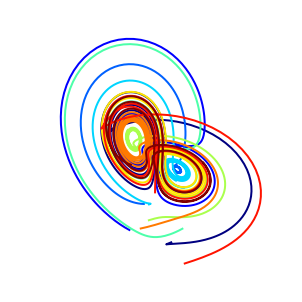

In [126]:
t, x_t = solve_lorenz(angle=0, N=10)

Using IPython's interactive function, we can explore how the trajectories behave as we change the various parameters.

In [127]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

The object returned by interactive is a Widget object and it has attributes that contain the current result and arguments:

In [128]:

t, x_t = w.result

In [129]:
w.kwargs

{'N': 32,
 'angle': 94.1,
 'max_time': 9.7,
 'sigma': 16.9,
 'beta': 2.6666666666666665,
 'rho': 28.0}

In [131]:
{'N': 10,
 'angle': 0.0,
 'beta': 2.6666666666666665,
 'max_time': 4.0,
 'rho': 28.0,
 'sigma': 10.0}


{'N': 10,
 'angle': 0.0,
 'beta': 2.6666666666666665,
 'max_time': 4.0,
 'rho': 28.0,
 'sigma': 10.0}

After interacting with the system, we can take the result and perform further computations.
In this case, we compute the average positions in $x$, $y$ and $z$.

In [132]:
xyz_avg = x_t.mean(axis=1)

In [133]:
xyz_avg.shape

(32, 3)

Creating histograms of the average positions (across different trajectories) 
show that on average the trajectories swirl about the attractors.

NOTE: These will look different from the lecture version if you adjusted
    any of the sliders in the interactive widget and changed the parameters.

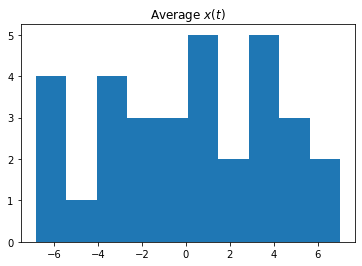

In [134]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

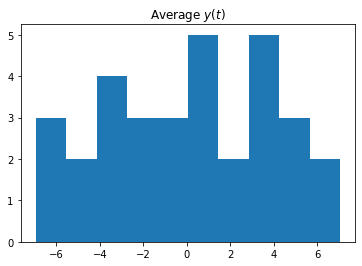

In [135]:

plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');